In [ ]:
#I will probably have to combine:
    #an ARIMA timeseries model
    #a linear regression model which takes into account time of day, weekend, eve of weekend, temperature and rain

In [17]:
#regression model

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [173]:
bicing_for_model = pd.read_csv("data/bicing_final.csv")

In [5]:
dummy_columns = ['is_weekend_or_bank_holiday', 'is_eve_of_weekend_or_bank_holiday', 'time_of_day']

In [6]:
bicing_for_model_dummies = pd.get_dummies(bicing_for_model, columns=dummy_columns, drop_first=False, dtype=int)

In [7]:
bicing_for_model_dummies.sample(1)

,Unnamed: 0,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,temperature,precipitation,is_weekend_or_bank_holiday_False,is_weekend_or_bank_holiday_True,is_eve_of_weekend_or_bank_holiday_False,is_eve_of_weekend_or_bank_holiday_True,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
9092,9092,275,5,270,2018-10-25 22:56:28,13.39,0.0,1,0,1,0,0,1,0,0


In [8]:
corr_bicing = bicing_for_model_dummies[["bikesInUsage", "temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]].corr()

In [9]:
corr_bicing

,bikesInUsage,temperature,precipitation,is_weekend_or_bank_holiday_True,is_eve_of_weekend_or_bank_holiday_True,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Night
bikesInUsage,1.000000,0.256415,-0.110473,-0.259573,-0.085190,-0.003293,0.311094,0.251980,-0.561824
temperature,0.256415,1.000000,0.039677,-0.038123,-0.035909,0.001498,0.296614,-0.097233,-0.202059
precipitation,-0.110473,0.039677,1.000000,0.009417,0.054220,-0.005240,0.005699,-0.029832,0.029414
is_weekend_or_bank_holiday_True,-0.259573,-0.038123,0.009417,1.000000,0.183119,-0.000351,-0.002992,0.000669,0.002687
is_eve_of_weekend_or_bank_holiday_True,-0.085190,-0.035909,0.054220,0.183119,1.000000,0.002113,-0.003011,-0.003501,0.004416
time_of_day_Morning,-0.003293,0.001498,-0.005240,-0.000351,0.002113,1.000000,-0.334771,-0.333368,-0.331725
time_of_day_Afternoon,0.311094,0.296614,0.005699,-0.002992,-0.003011,-0.334771,1.000000,-0.334943,-0.333292
time_of_day_Evening,0.251980,-0.097233,-0.029832,0.000669,-0.003501,-0.333368,-0.334943,1.000000,-0.331895
time_of_day_Night,-0.561824,-0.202059,0.029414,0.002687,0.004416,-0.331725,-0.333292,-0.331895,1.000000


In [10]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

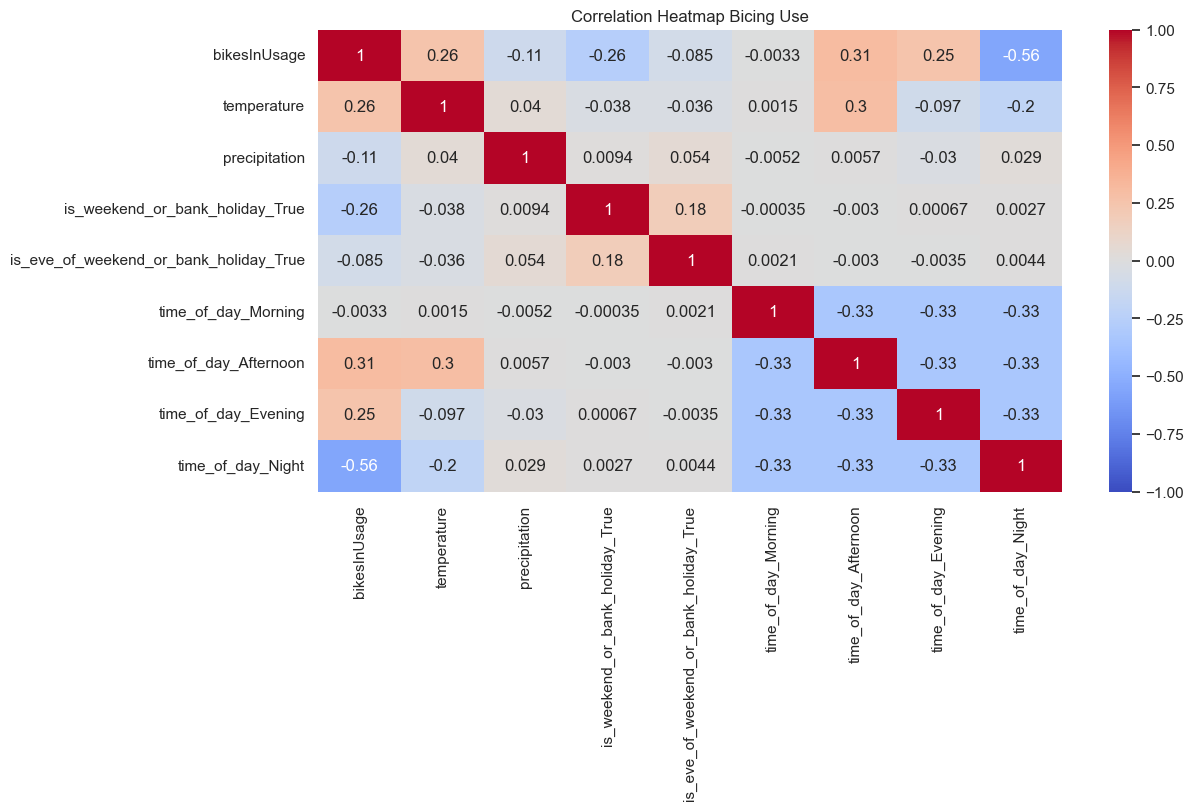

In [11]:
sns.heatmap(corr_bicing, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Bicing Use')
plt.show()

In [21]:
X = bicing_for_model_dummies[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]]
y = bicing_for_model_dummies.bikesInUsage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
bicing_linreg = LinReg()

In [23]:
bicing_for_model_dummies.isna().sum()

Unnamed: 0                                 0
bikesInUsage                               0
electricalBikesInUsage                     0
mechanicalBikesInUsage                     0
dateTime                                   0
temperature                                0
precipitation                              0
is_weekend_or_bank_holiday_False           0
is_weekend_or_bank_holiday_True            0
is_eve_of_weekend_or_bank_holiday_False    0
is_eve_of_weekend_or_bank_holiday_True     0
time_of_day_Afternoon                      0
time_of_day_Evening                        0
time_of_day_Morning                        0
time_of_day_Night                          0
dtype: int64

In [24]:
bicing_for_model_dummies = bicing_for_model_dummies.dropna()

In [25]:
bicing_for_model_dummies.isna().sum()

Unnamed: 0                                 0
bikesInUsage                               0
electricalBikesInUsage                     0
mechanicalBikesInUsage                     0
dateTime                                   0
temperature                                0
precipitation                              0
is_weekend_or_bank_holiday_False           0
is_weekend_or_bank_holiday_True            0
is_eve_of_weekend_or_bank_holiday_False    0
is_eve_of_weekend_or_bank_holiday_True     0
time_of_day_Afternoon                      0
time_of_day_Evening                        0
time_of_day_Morning                        0
time_of_day_Night                          0
dtype: int64

In [26]:
bicing_linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
#evaluating on training data

In [34]:
y_pred = bicing_linreg.predict(X_test)
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.44817611988336936


In [36]:
np.sqrt(mean_squared_error(y_pred, y_test))

178.787032414607

In [37]:
#haha

In [38]:
#trying to play around a bit with the variables but pretty sure linear regression is dead

In [ ]:
#removing colinear variables

In [51]:
X = bicing_for_model_dummies[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Night"]]
y = bicing_for_model_dummies.bikesInUsage

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [58]:
bicing_linreg_2 = LinReg()

In [59]:
bicing_linreg_2.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = bicing_linreg_2.predict(X_test)
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.40583386612702


In [61]:
np.sqrt(mean_squared_error(y_pred, y_test))

181.5155526373587

In [71]:
#reducing test sample size = better, removing colinear variables = worse
#keep playing around
#removing 2 variables with least correlation (time of day morning + is eve of weekend or bank holiday)

In [63]:
X = bicing_for_model_dummies[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]]
y = bicing_for_model_dummies.bikesInUsage

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [65]:
bicing_linreg_3 = LinReg()

In [68]:
bicing_linreg_3.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = bicing_linreg_3.predict(X_test)
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.4569354021470837


In [70]:
np.sqrt(mean_squared_error(y_pred, y_test))

173.2749244417765

In [72]:
#This is the best one so far, worth taking into account as I try diff models

In [160]:
X = bicing_for_model_dummies[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]]
y = bicing_for_model_dummies.bikesInUsage

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [162]:
bicing_RFR = RFR()

In [163]:
bicing_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [164]:
y_pred = bicing_RFR.predict(X_train)
print(f"r2: {metrics.r2_score(y_train, y_pred)}")

r2: 0.8753540342723468


In [166]:
np.sqrt(mean_squared_error(y_pred, y_train))

83.02316411598193

In [133]:
y_pred = bicing_RFR.predict(X_test)
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.850085221131712


In [134]:
np.sqrt(mean_squared_error(y_pred, y_test))

91.40002083311222

In [103]:
#RFR best one yet!! - all variables again, split at 0.1

In [152]:
X = bicing_for_model_dummies[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Night"]]
y = bicing_for_model_dummies.bikesInUsage

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [154]:
bicing_GBR = GBR()

In [155]:
bicing_GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [156]:
y_pred = bicing_GBR.predict(X_test)
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.5503690246862631


In [157]:
np.sqrt(mean_squared_error(y_pred, y_test))

159.85912578564356

In [ ]:
#Boo GBR

In [158]:
#Now going to try ARIMA, maybe ARIMAX, and Prophet, and maybe LSTM

CHATGPT: 

ARIMA with Exogenous Variables (ARIMAX):
Combines ARIMA with additional exogenous (external) variables.
Allows you to include your categorical features.

Prophet with Regressors:
Prophet can be extended to include additional regressors.
Enables incorporating external features into the time series model.

LSTM with Additional Features:
You can concatenate additional features with the LSTM input.
Allows the model to learn from both time series and external features.


In [168]:
#ARIMA

In [183]:
bicing_for_timeseries_model = bicing_for_model_dummies.set_index('dateTime')

In [184]:
bicing_for_timeseries_model = bicing_for_timeseries_model.drop('Unnamed: 0', axis = 1)

In [ ]:
#Checking autocorrelation and stationarity

In [188]:
def plotting_acf (df):
    plot_acf(bicing_for_timeseries_model.bikesInUsage);
    plt.title("Autocorrelation of Bikes in Usage: value of correlation across different # of lags", size=20)
    plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


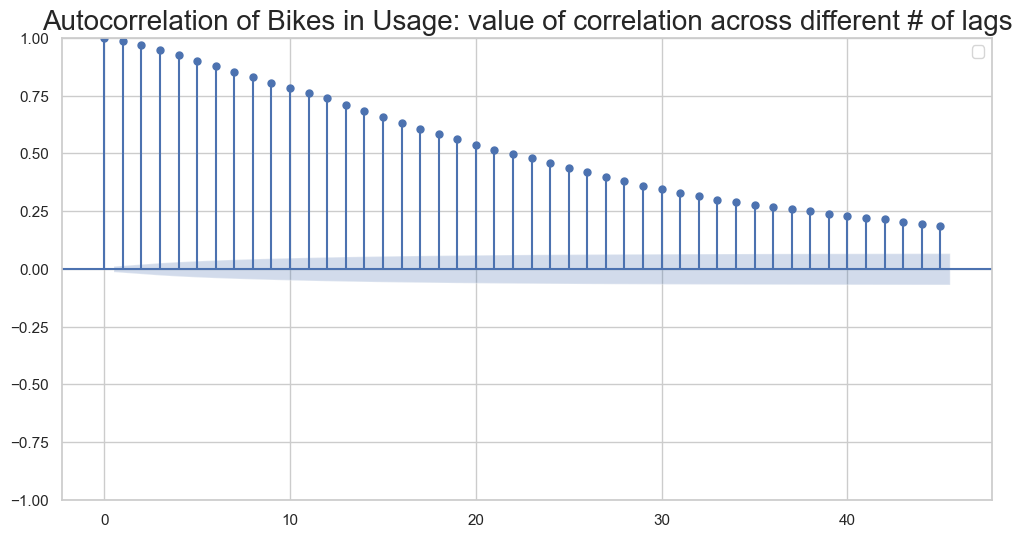

In [189]:
plotting_acf (bicing_for_timeseries_model)

In [190]:
#Gradual decrease in the ACF

In [192]:
def plotting_partial (df):
    plot_pacf(bicing_for_timeseries_model.bikesInUsage)
    plt.title("Partial autocorrelation of Bikes in Usage: value of correlation across different # of lags", size=20);

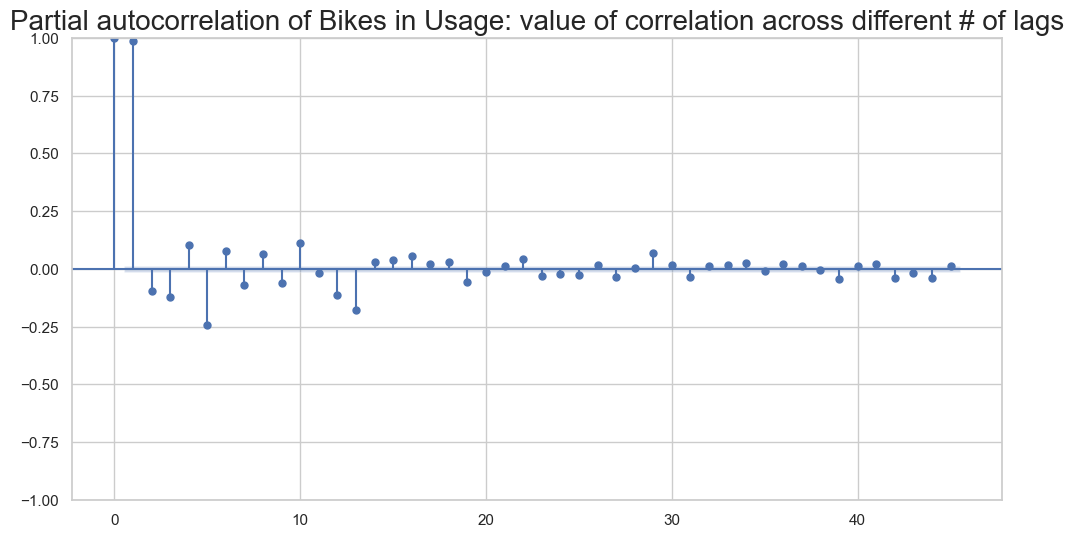

In [193]:
plotting_partial (bicing_for_timeseries_model)

In [195]:
#Sharp drop in the PACF; model to use is AR (p)

In [ ]:
#Now going to check for stationarity

In [198]:
res = adfuller(bicing_for_timeseries_model["bikesInUsage"])
res

(-16.48152237702041,
 2.2348729982019534e-29,
 49,
 25906,
 {'1%': -3.4306024491653035,
  '5%': -2.8616515750597045,
  '10%': -2.5668293881120388},
 260260.54483788027)

In [199]:
p_value = res[1]

In [202]:
def dickey_rejects (bicing_for_timeseries_model, alpha = 0.05):
    
    p_value = adfuller(bicing_for_timeseries_model)[0]
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"

In [203]:
dickey_rejects(bicing_for_timeseries_model["bikesInUsage"])

'We reject H0 and accept H1: The series IS stationary'

In [204]:
#Amazing. 
#So we use AR and it is stationary

In [207]:
from statsmodels.tsa.api import acf, pacf
from statsmodels.tsa.stattools import arma_order_select_ic

# Determine lag order using AIC
order_aic = arma_order_select_ic(bicing_for_timeseries_model['bikesInUsage'], ic='aic', trend='c')
print(f'Best lag order based on AIC: {order_aic["aic_min_order"]}')

/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best lag order based on AIC: (2, 2)


In [208]:
#aligns with the sharp drop in the PACF

In [210]:
#Now to make the AR model

In [250]:
y_train = bicing_for_timeseries_model["bikesInUsage"][:-5000]
y_test = bicing_for_timeseries_model["bikesInUsage"][-5001:]

In [251]:
bicing_AR = AutoReg(bicing_for_timeseries_model['bikesInUsage'], lags=2)
bicing_AR = bicing_AR.fit()

/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [252]:
y_pred = bicing_AR.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [253]:
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: 0.9995731297438433


In [254]:
np.sqrt(mean_squared_error(y_pred, y_test))

3.7724987768362763

In [244]:
#suspiciously high, not sure what's going on here

In [ ]:
#let's try ARMAX

In [246]:
exog_data_train = bicing_for_timeseries_model[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]][:-3000]
exog_data_test = bicing_for_timeseries_model[["temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]][-3001:]

# Assuming 'bikesInUsage' is your target variable
y_train = bicing_for_timeseries_model["bikesInUsage"][:-3000]
y_test = bicing_for_timeseries_model["bikesInUsage"][-3001:]

# Fit ARMAX model
order = (2, 0, 0)  # Adjust order based on your analysis
model = ARIMA(y_train, order=order, exog=exog_data_train)
bicing_ARMAX = model.fit()

# Make predictions on the test set
y_pred = bicing_ARMAX.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=exog_data_test)

/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been pr

In [247]:
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

r2: -3.795141827985728


In [248]:
np.sqrt(mean_squared_error(y_pred, y_test))

307.2405701804126